In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('SF data summary Interpolated.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

Date  House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
146   5/1/2017                           237.583333                     4.01   
147   6/1/2017                           239.080717                     3.90   
148   7/1/2017                           240.733514                     3.97   
149   8/1/2017                           242.109323                     3.88   
150   9/1/2017                           244.795861                     3.81   
151  10/1/2017                           248.251792                     3.90   
152  11/1/2017                           252.430756                     3.92   
153  12/1/2017                           255.294023                     3.95   
154   1/1/2018                           258.569765                     4.03   
155   2/1/2018                           260.248492                     4.33   
156   3/1/2018                           261.822888                     4.44   
157   4/1/2018                           261.714329                     4.47   
158   5/1/2018                           263.664436                     4.59   
159   6/1/2018                           264.833339                     4.57   
160   7/1/2018                           266.780509                     4.53   
161   8/1/2018                           267.559797                     4.55   
162   9/1/2018                           268.832899                     4.63   
163  10/1/2018                           267.767739                     4.83   
164  11/1/2018                           266.336767                     4.87   
165  12/1/2018                           263.919019                     4.64   

     Personal_Income  Resident_Population  Unemployment_Rate          GDP  \
146       95522.0000          4717.052000                3.1  539576.4840   
147       96111.2500          4718.209750                3.5  542398.8940   
148       96700.5000          4719.367500                3.7  545221.3040   
149       97289.7500          4720.525250                3.6  548043.7140   
150       97879.0000          4721.683000                3.1  550866.1240   
151       98468.2500          4722.840750                3.0  553688.5340   
152       99057.5000          4723.998500                2.9  556510.9440   
153       99646.7500          4725.156250                2.8  559333.3540   
154      100236.0000          4726.314000                3.1  562155.7640   
155      100626.4167          4726.771417                3.0  564638.2383   
156      101016.8333          4727.228833                2.9  567120.7127   
157      101407.2500          4727.686250                2.6  569603.1870   
158      101797.6667          4728.143667                2.4  572085.6613   
159      102188.0833          4728.601083                3.0  574568.1357   
160      102578.5000          4729.058500                3.0  577050.6100   
161      102968.9167          4729.515917                2.9  579533.0843   
162      103359.3333          4729.973333                2.6  582015.5587   
163      103749.7500          4730.430750                2.7  584498.0330   
164      104140.1667          4730.888167                2.6  586980.5073   
165      104530.5833          4731.345583                2.7  589462.9817   

     Crime_Rate Percent_With_Mortgage_Debt  Median_Debt  \
146  712.405942                     34.80%  374630.0000   
147  712.776950                     34.70%  374524.0000   
148  713.147958                     34.70%  374736.6667   
149  713.518967                     34.70%  374949.3333   
150  713.889975                     34.70%  375162.0000   
151  714.260983                     34.60%  375460.3333   
152  714.631992                     34.50%  375758.6667   
153  715.003000                     34.40%  376057.0000   
154  712.993958                     34.53%  375355.6667   
155  710.984917                     34.67%  374654.3333   
156  708.975875                     34.80%  373953.0000   
157

In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

Date  House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0  3/1/2005                           200.468634                     5.93   
1  4/1/2005                           202.308244                     5.86   
2  5/1/2005                           204.821172                     5.72   
3  6/1/2005                           207.194994                     5.58   
4  7/1/2005                           209.307840                     5.70   

   Personal_Income  Resident_Population  Unemployment_Rate          GDP  \
0          55702.0            4149.6070                5.1  284589.3790   
1          56203.0            4150.9246                4.7  286369.0239   
2          56704.0            4152.2422                4.5  288148.6688   
3          57205.0            4153.5598                4.9  289928.3137   
4          57706.0            4154.8774                5.0  291707.9586   

   Crime_Rate  Median_Debt  New_Structures  Economic_Conditions_Index  \
0   761.32167     357406.0            1201                       2.90   
1   765.49504     359667.0            1239                       3.01   
2   769.66841     361928.0            1304                       2.58   
3   773.84178     364189.0            1345                       3.00   
4   778.01515     365445.0            1337                       3.20   

   CPI all items less shelter  Percent_With_Mortgage_Debt  \
0                       182.9                       40.30   
1                       182.9                       40.30   
2                       180.6                       40.30   
3                       180.6                       40.30   
4                       183.4                       40.23   

   Percent_With_Severely_Delinquent_Debt  
0                                    0.3  
1                                    0.3  
2                                    0.3  
3                                    0.3  
4                                    0.3

In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI all items less shelter               0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0                             200.468634                     5.93   
1                             202.308244                     5.86   
2                             204.821172                     5.72   
3                             207.194994                     5.58   
4                             209.307840                     5.70   
..                                   ...                      ...   
149                           242.109323                     3.88   
150                           244.795861                     3.81   
151                           248.251792                     3.90   
152                           252.430756                     3.92   
153                           255.294023                     3.95   

     Personal_Income  Resident_Population  Unemployment_Rate          GDP  \
0           55702.00           4149.60700                5.1  284589.3790   
1           56203.00           4150.92460                4.7  286369.0239   
2           56704.00           4152.24220                4.5  288148.6688   
3           57205.00           4153.55980                4.9  289928.3137   
4           57706.00           4154.87740                5.0  291707.9586   
..               ...                  ...                ...          ...   
149         97289.75           4720.52525                3.6  548043.7140   
150         97879.00           4721.68300                3.1  550866.1240   
151         98468.25           4722.84075                3.0  553688.5340   
152         99057.50           4723.99850                2.9  556510.9440   
153         99646.75           4725.15625                2.8  559333.3540   

     Crime_Rate  Median_Debt  New_Structures  Economic_Conditions_Index  \
0    761.321670  357406.0000            1201                       2.90   
1    765.495040  359667.0000            1239                       3.01   
2    769.668410  361928.0000            1304                       2.58   
3    773.841780  364189.0000            1345                       3.00   
4    778.015150  365445.0000            1337                       3.20   
..          ...          ...             ...                        ...   
149  713.518967  374949.3333            1582                       4.20   
150  713.889975  375162.0000             906                       4.48   
151  714.260983  375460.3333            1576                       4.61   
152  714.631992  375758.6667            1372                       4.82   
153  715.003000  376057.0000            2004                       4.95   

     CPI all items less shelter  Percent_With_Mortgage_Debt  \
0                       182.900                       40.30   
1                       182.900                       40.30   
2                       180.600                       40.30   
3                       180.600                       40.30   
4                       183.400                       40.23   
..                          ...                         ...   
149                     235.803                       34.70   
150                     237.011                       34.70   
151                     237.011                       34.60   
152                     236.108                       34.50   
153                     236.108                       34.40   

     Percent_With_Severely_Delinquent_Debt  
0                                      0.3  
1                                      0.3  
2                                      0.3  
3                                      0.3  
4                                      0.3  
..                                     ...  
149                                    0.5  
150                                    0.5  
151                                    0.5  
152                                    0.5  
153                                    0.5  

[154 rows x 13 columns]

In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

count           mean           std  \
Mortgage_Rate (30 yers)                154.0       4.769286      1.037777   
Personal_Income                        154.0   71738.123377  12040.966796   
Resident_Population                    154.0    4442.515471    190.621898   
Unemployment_Rate                      154.0       6.039610      2.257954   
GDP                                    154.0  382311.220907  79819.258760   
Crime_Rate                             154.0     773.719333     64.842465   
Median_Debt                            154.0  387444.279221  19791.675018   
New_Structures                         154.0     848.733766    472.622402   
Economic_Conditions_Index              154.0       3.108052      3.370036   
CPI all items less shelter             154.0     214.132597     16.378875   
Percent_With_Mortgage_Debt             154.0      38.472078      2.337837   
Percent_With_Severely_Delinquent_Debt  154.0       2.761039      2.349443   

                                               min            25%  \
Mortgage_Rate (30 yers)                     3.3500       3.912500   
Personal_Income                         55702.0000   61960.208335   
Resident_Population                      4149.6070    4280.642021   
Unemployment_Rate                           2.8000       4.225000   
GDP                                    284589.3790  316933.351950   
Crime_Rate                                659.6285     713.982727   
Median_Debt                            357406.0000  370240.083325   
New_Structures                            136.0000     434.750000   
Economic_Conditions_Index                  -9.4500       2.282500   
CPI all items less shelter                180.6000     200.776000   
Percent_With_Mortgage_Debt                 34.4000      36.507500   
Percent_With_Severely_Delinquent_Debt       0.3000       0.700000   

                                                 50%            75%  \
Mortgage_Rate (30 yers)                     4.430000       5.850000   
Personal_Income                         68183.541665   80937.083332   
Resident_Population                      4428.088500    4630.876938   
Unemployment_Rate                           5.000000       8.200000   
GDP                                    350416.639900  443908.466100   
Crime_Rate                                778.179121     829.040646   
Median_Debt                            376476.000000  405887.083325   
New_Structures                            801.000000    1236.250000   
Economic_Conditions_Index                   4.245000       5.242500   
CPI all items less shelter                217.875000     229.137000   
Percent_With_Mortgage_Debt                 39.120000      40.635000   
Percent_With_Severely_Delinquent_Debt       1.750000       4.760000   

                                                max  
Mortgage_Rate (30 yers)                     6.76000  
Personal_Income                         99646.75000  
Resident_Population                      4725.15625  
Unemployment_Rate                          10.30000  
GDP                                    559333.35400  
Crime_Rate                                875.63750  
Median_Debt                            421588.00000  
New_Structures                           2358.00000  
Economic_Conditions_Index                   7.04000  
CPI all items less shelter                237.10700  
Percent_With_Mortgage_Debt                 41.20000  
Percent_With_Severely_Delinquent_Debt       7.30000

In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

Mortgage_Rate (30 yers)  Personal_Income  Resident_Population  \
0                  1.118462        -1.331797            -1.536594   
1                  1.051011        -1.290189            -1.529682   
2                  0.916107        -1.248581            -1.522770   
3                  0.781203        -1.206973            -1.515858   
4                  0.896835        -1.165365            -1.508946   
5                  1.012467        -1.123757            -1.502033   
6                  0.964287        -1.082149            -1.495121   
7                  1.253366        -1.040541            -1.488209   
8                  1.503902        -0.998933            -1.481297   
9                  1.446086        -0.957325            -1.474385   
10                 1.330454        -0.915717            -1.467473   
11                 1.426814        -0.899917            -1.450247   
12                 1.494266        -0.884117            -1.433022   
13                 1.677350        -0.868317            -1.415796   
14                 1.764073        -0.852517            -1.398570   
15                 1.841161        -0.836716            -1.381345   
16                 1.918249        -0.820916            -1.364119   
17                 1.686985        -0.805116            -1.346893   
18                 1.571354        -0.789316            -1.329668   
19                 1.532810        -0.773515            -1.312442   

    Unemployment_Rate       GDP  Crime_Rate  Median_Debt  New_Structures  \
0           -0.416134 -1.224289   -0.191197    -1.517723        0.745344   
1           -0.593285 -1.201993   -0.126835    -1.403483        0.825746   
2           -0.681861 -1.179697   -0.062473    -1.289243        0.963277   
3           -0.504709 -1.157401    0.001888    -1.175003        1.050027   
4           -0.460421 -1.135105    0.066250    -1.111542        1.033100   
5           -0.548997 -1.112809    0.130612    -1.048081        0.893454   
6           -0.593285 -1.090513    0.194973    -0.984620        2.753289   
7           -0.637573 -1.068217    0.259335    -0.861370        0.184643   
8           -0.593285 -1.045922    0.323697    -0.738119        1.744027   
9           -0.859012 -1.023626    0.388058    -0.614869        0.802472   
10          -0.726149 -1.001330    0.486702    -0.438835       -0.162357   
11          -0.681861 -0.990424    0.585346    -0.262801        0.975972   
12          -0.726149 -0.979518    0.683989    -0.086768        1.940801   
13          -0.859012 -0.968612    0.782633    -0.047340       -0.084071   
14          -0.947588 -0.957707    0.881276    -0.007913        2.416869   
15          -0.770437 -0.946801    0.979920     0.031514        0.838441   
16          -0.681861 -0.935895    1.078563     0.144626       -0.503010   
17          -0.770437 -0.924989    1.177207     0.257737        0.967509   
18          -0.903300 -0.914084    1.275851     0.370849        0.296783   
19          -0.947588 -0.903178    1.374494     0.529535       -0.026943   

    Economic_Conditions_Index  CPI all items less shelter  \
0                   -0.061736                   -1.906883   
1                   -0.029095                   -1.906883   
2                   -0.156690                   -2.047308   
3                   -0.032063                   -2.047308   
4                    0.027284                   -1.876356   
5                    0.024317                   -1.876356   
6                    0.068827                   -1.644350   
7                    0.128173                   -1.644350   
8                    0.249834                   -1.894672   
9                    0.347755                   -1.894672   
10                   0.288409                   -1.662666   
11                   0.140042                   -1.662666   
12                   0.068827                   -1.503925   
13                   0.113336                   -1.503925   
14                   0.398200             

In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.32369158],
       [0.31396595],
       [0.3305701 ],
       [0.32766408],
       [0.31542948],
       [0.27782762],
       [0.56727237],
       [0.12783471],
       [0.42219108],
       [0.17412508]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

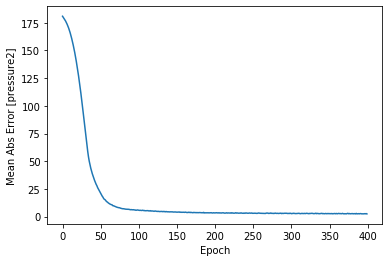

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 6.15
Accuracy: 97.68 %.


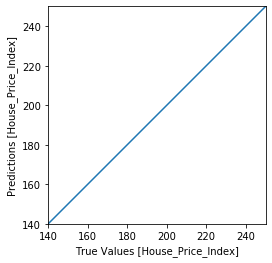

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.49
Accuracy: 98.7 %.


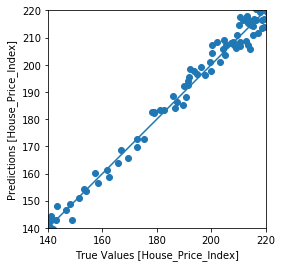

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0                             200.468634                     5.93   
1                             202.308244                     5.86   
2                             204.821172                     5.72   
3                             207.194994                     5.58   
4                             209.307840                     5.70   
..                                   ...                      ...   
161                           267.559797                     4.55   
162                           268.832899                     4.63   
163                           267.767739                     4.83   
164                           266.336767                     4.87   
165                           263.919019                     4.64   

     Personal_Income  Resident_Population  Unemployment_Rate          GDP  \
0         55702.0000          4149.607000                5.1  284589.3790   
1         56203.0000          4150.924600                4.7  286369.0239   
2         56704.0000          4152.242200                4.5  288148.6688   
3         57205.0000          4153.559800                4.9  289928.3137   
4         57706.0000          4154.877400                5.0  291707.9586   
..               ...                  ...                ...          ...   
161      102968.9167          4729.515917                2.9  579533.0843   
162      103359.3333          4729.973333                2.6  582015.5587   
163      103749.7500          4730.430750                2.7  584498.0330   
164      104140.1667          4730.888167                2.6  586980.5073   
165      104530.5833          4731.345583                2.7  589462.9817   

     Crime_Rate  Median_Debt  New_Structures  Economic_Conditions_Index  \
0    761.321670  357406.0000            1201                       2.90   
1    765.495040  359667.0000            1239                       3.01   
2    769.668410  361928.0000            1304                       2.58   
3    773.841780  364189.0000            1345                       3.00   
4    778.015150  365445.0000            1337                       3.20   
..          ...          ...             ...                        ...   
161  698.930667  373757.0000            1736                       3.70   
162  696.921625  374017.0000             742                       3.42   
163  694.912583  374294.3333            1262                       3.45   
164  692.903542  374571.6667             776                       3.39   
165  690.894500  374849.0000            2921                       3.00   

     CPI all items less shelter  Percent_With_Mortgage_Debt  \
0                       182.900                       40.30   
1                       182.900                       40.30   
2                       180.600                       40.30   
3                       180.600                       40.30   
4                       183.400                       40.23   
..                          ...                         ...   
161                     245.933                       34.47   
162                     248.281                       34.50   
163                     248.281                       34.30   
164                     247.939                       34.10   
165                     247.939                       33.90   

     Percent_With_Severely_Delinquent_Debt  
0                                      0.3  
1                                      0.3  
2                                      0.3  
3                                      0.3  
4                                      0.3  
..                                     ...  
161                                    0.4  
162                                    0.4  
163                                    0.4  
164                                    0.4  
165                                    0.4  

[166 rows x 13 columns]

In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

Date  House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0     3/1/2005                           200.468634                     5.93   
1     4/1/2005                           202.308244                     5.86   
2     5/1/2005                           204.821172                     5.72   
3     6/1/2005                           207.194994                     5.58   
4     7/1/2005                           209.307840                     5.70   
..         ...                                  ...                      ...   
161   8/1/2018                           267.559797                     4.55   
162   9/1/2018                           268.832899                     4.63   
163  10/1/2018                           267.767739                     4.83   
164  11/1/2018                           266.336767                     4.87   
165  12/1/2018                           263.919019                     4.64   

     Personal_Income  Resident_Population  Unemployment_Rate          GDP  \
0         55702.0000          4149.607000                5.1  284589.3790   
1         56203.0000          4150.924600                4.7  286369.0239   
2         56704.0000          4152.242200                4.5  288148.6688   
3         57205.0000          4153.559800                4.9  289928.3137   
4         57706.0000          4154.877400                5.0  291707.9586   
..               ...                  ...                ...          ...   
161      102968.9167          4729.515917                2.9  579533.0843   
162      103359.3333          4729.973333                2.6  582015.5587   
163      103749.7500          4730.430750                2.7  584498.0330   
164      104140.1667          4730.888167                2.6  586980.5073   
165      104530.5833          4731.345583                2.7  589462.9817   

     Crime_Rate Percent_With_Mortgage_Debt  Median_Debt  \
0    761.321670                     40.30%  357406.0000   
1    765.495040                     40.30%  359667.0000   
2    769.668410                     40.30%  361928.0000   
3    773.841780                     40.30%  364189.0000   
4    778.015150                     40.23%  365445.0000   
..          ...                        ...          ...   
161  698.930667                     34.47%  373757.0000   
162  696.921625                     34.50%  374017.0000   
163  694.912583                     34.30%  374294.3333   
164  692.903542                     34.10%  374571.6667   
165  690.894500                     33.90%  374849.0000   

    Percent_With_Severely_Delinquent_Debt  New_Structures  \
0                                   0.30%            1201   
1                                   0.30%            1239   
2                                   0.30%            1304   
3                                   0.30%            1345   
4                                   0.30%            1337   
..                                    ...             ...   
161                                 0.40%            1736   
162                                 0.40%             742   
163                                 0.40%            1262   
164                                 0.40%             776   
165                                 0.40%            2921   

     Economic_Conditions_Index  CPI all items less shelter           0  
0                         2.90                     182.900  207.224197  
1                         3.01                     182.900  208.512238  
2                         2.58                     180.600  208.971542  
3                         3.00                     180.600  208.209045  
4                         3.20                     183.400  206.013077  
..                         ...                         ...         ...  
161                       3.70                     245.933  271.710114  
162                       3.42                     248.281  275.776917  
163                      

In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)